In [2]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [3]:
ls

MyDrive/  Shareddrives/


In [4]:
cd /gdrive/MyDrive/Customer churn prediction

/gdrive/MyDrive/Customer churn prediction


In [5]:
ls

customer_churn.csv


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
import warnings

In [8]:
df=pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
df.Churn.value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

In [12]:
columns = df.columns
binary_cols = []

for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [13]:
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [14]:
multiple_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

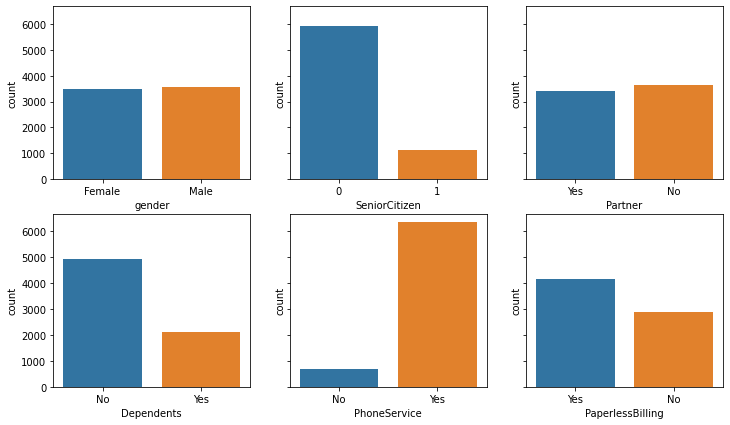

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)

sns.countplot("gender", data=df, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot("Partner", data=df, ax=axes[0,2])
sns.countplot("Dependents", data=df, ax=axes[1,0])
sns.countplot("PhoneService", data=df, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=df, ax=axes[1,2])


In [16]:
churn_numeric = {'Yes':1, 'No':0}
df.Churn.replace(churn_numeric, inplace=True)

In [17]:
df[['gender','Churn']].groupby(['gender']).mean()


,Churn
gender,
Female,0.269209
Male,0.261603


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


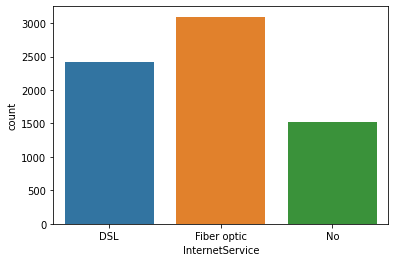

In [18]:
sns.countplot("InternetService", data=df)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

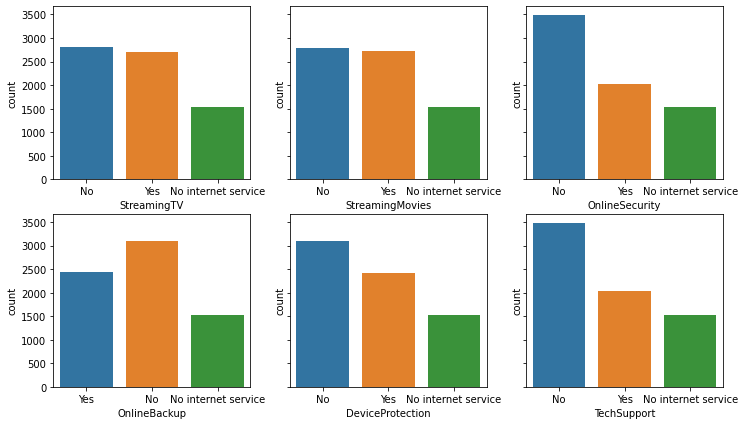

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)

sns.countplot("StreamingTV", data=df, ax=axes[0,0])
sns.countplot("StreamingMovies", data=df, ax=axes[0,1])
sns.countplot("OnlineSecurity", data=df, ax=axes[0,2])
sns.countplot("OnlineBackup", data=df, ax=axes[1,0])
sns.countplot("DeviceProtection", data=df, ax=axes[1,1])
sns.countplot("TechSupport", data=df, ax=axes[1,2])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


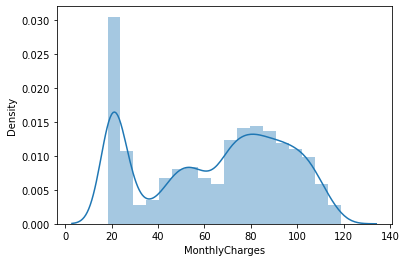

In [20]:

sns.distplot(df["MonthlyCharges"])

In [21]:
df.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)


In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [23]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
        'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
X = pd.get_dummies(df, columns=cat_features, drop_first=True)


In [24]:
sc = MinMaxScaler()
a = sc.fit_transform(df[['tenure']])
b = sc.fit_transform(df[['MonthlyCharges']])

In [25]:
X['tenure'] = a
X['MonthlyCharges'] = b

In [26]:
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]

In [27]:
print(len(X_no),len(X_yes))


5174 1869


In [28]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

5174


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distribution After Resampling')

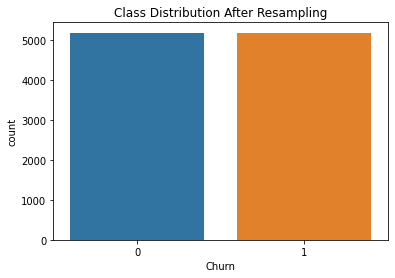

In [29]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
sns.countplot('Churn', data=X_upsampled).set_title('Class Distribution After Resampling')

In [30]:
from sklearn.model_selection import train_test_split
X = X_upsampled.drop(['Churn'], axis=1) 
y = X_upsampled['Churn'] 


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Ridge Classifier

In [32]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [33]:
clf_ridge = RidgeClassifier()
clf_ridge.fit(X_train, y_train)

RidgeClassifier()

In [34]:
pred = clf_ridge.predict(X_train) 
accuracy_score(y_train, pred)

0.7574293307562213

In [35]:
confusion_matrix(y_train, pred)

array([[3051, 1079],
       [ 929, 3219]])

In [36]:
pred_test = clf_ridge.predict(X_test)
q=accuracy_score(y_test, pred_test)

In [37]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [38]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1044
           1       0.75      0.78      0.76      1026

    accuracy                           0.76      2070
   macro avg       0.76      0.76      0.76      2070
weighted avg       0.76      0.76      0.76      2070



In [39]:
cma = confusion_matrix(y_test, pred_test)

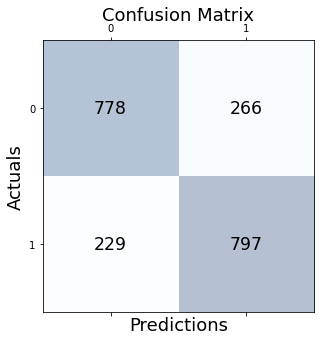

In [40]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Decision tree classifier

In [41]:
from sklearn import tree

In [42]:
 clf = tree.DecisionTreeClassifier()
 clf = clf.fit(X_train, y_train)

In [43]:
pred1 = clf.predict(X_train)
accuracy_score(y_train, pred1)

0.996859144720947

In [44]:
confusion_matrix(y_train, pred1)

array([[4109,   21],
       [   5, 4143]])

In [45]:
pred1_test = clf.predict(X_test)
r=accuracy_score(y_test, pred1_test)

In [46]:
print(classification_report(y_test, pred1_test))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88      1044
           1       0.84      0.96      0.89      1026

    accuracy                           0.89      2070
   macro avg       0.89      0.89      0.89      2070
weighted avg       0.89      0.89      0.88      2070



In [47]:
cma = confusion_matrix(y_test, pred1_test)

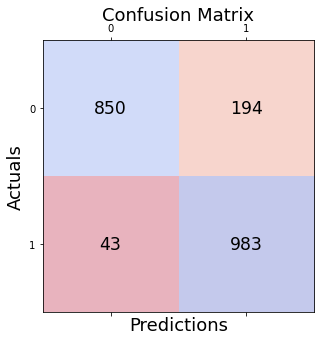

In [48]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Logistic regression

In [49]:
from sklearn.linear_model import LogisticRegression  
clf= LogisticRegression(random_state=0)  
clf.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [50]:
pred_LR= clf.predict(X_train)
accuracy_score(y_train, pred_LR)

0.7553756946122252

In [51]:
confusion_matrix(y_train, pred_LR)

array([[3088, 1042],
       [ 983, 3165]])

In [52]:
pred_LR_test = clf.predict(X_test)
s=accuracy_score(y_test, pred_LR_test)

In [53]:
print(classification_report(y_test, pred_LR_test))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1044
           1       0.75      0.77      0.76      1026

    accuracy                           0.76      2070
   macro avg       0.76      0.76      0.76      2070
weighted avg       0.76      0.76      0.76      2070



In [54]:
cma = confusion_matrix(y_test, pred_LR_test)

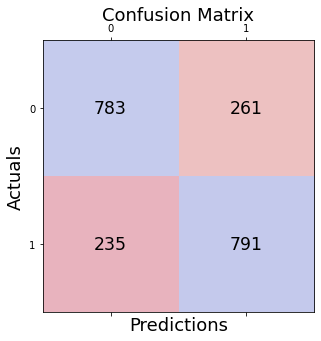

In [55]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Support vector machine

In [56]:
from sklearn.svm import SVC  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

In [57]:
pred_SVM= classifier.predict(X_train)
accuracy_score(y_train, pred_SVM)

0.7558589031166949

In [58]:
confusion_matrix(y_train, pred_SVM)

array([[3046, 1084],
       [ 937, 3211]])

In [59]:
pred_SVM_test = classifier.predict(X_test)
t=accuracy_score(y_test, pred_SVM_test)

In [60]:
print(classification_report(y_test, pred_SVM_test))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1044
           1       0.75      0.78      0.76      1026

    accuracy                           0.76      2070
   macro avg       0.76      0.76      0.76      2070
weighted avg       0.76      0.76      0.76      2070



In [61]:
cma = confusion_matrix(y_test, pred_SVM_test)

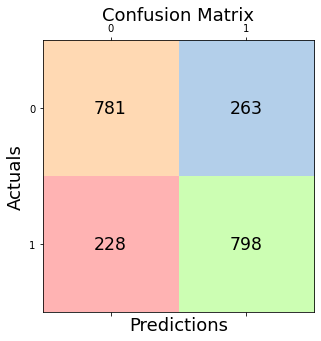

In [62]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Neural networks

In [63]:
from sklearn.neural_network import MLPClassifier

In [64]:
clf= MLPClassifier(solver='lbfgs', alpha=1e-5,
           hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [65]:
pred_NN= clf.predict(X_train)
accuracy_score(y_train, pred_NN)

0.7628654264315052

In [66]:
confusion_matrix(y_train, pred_SVM)

array([[3046, 1084],
       [ 937, 3211]])

In [67]:
pred_NN_test = clf.predict(X_test)
u=accuracy_score(y_test, pred_NN_test)

In [68]:
print(classification_report(y_test, pred_NN_test))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1044
           1       0.76      0.78      0.77      1026

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



In [69]:
cma = confusion_matrix(y_test, pred_NN_test)

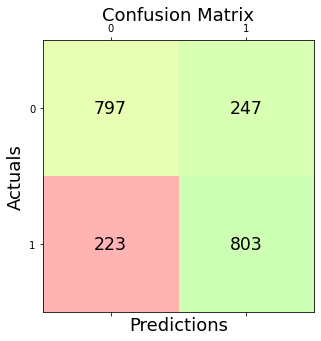

In [70]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Random forest cassifier

In [71]:
clf_forest = rf(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [72]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.8864460014496255

In [73]:
confusion_matrix(y_train, pred)

array([[3426,  704],
       [ 236, 3912]])

In [84]:
pred_test = clf_forest.predict(X_test)
v=accuracy_score(y_test, pred_test)

In [75]:
from sklearn.model_selection import GridSearchCV


In [76]:
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
forest =rf()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

In [77]:
clf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]})

In [78]:
clf.best_params_

{'max_depth': 25, 'n_estimators': 150}

In [79]:
clf.best_score_

0.8999813207622063

In [80]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1044
           1       0.80      0.91      0.85      1026

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.85      0.84      0.84      2070



In [81]:
cma = confusion_matrix(y_test, pred_test)

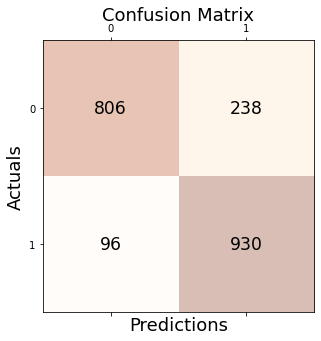

In [82]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Comparative Analysis

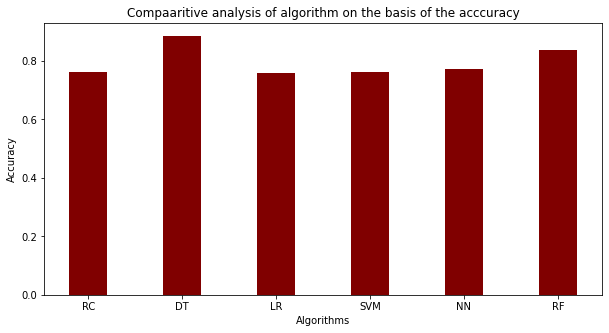

In [85]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'RC':q, 'DT':r,'LR':s,'SVM':t,'NN':u, 'RF':v}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(courses, values, color ='maroon',
		width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Compaaritive analysis of algorithm on the basis of the acccuracy")
plt.show()


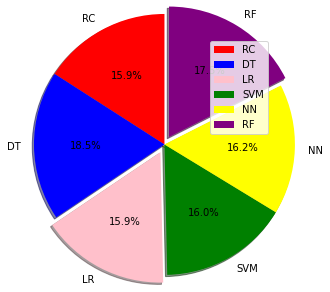

In [88]:
activities = ['RC', 'DT', 'LR','SVM','NN', 'RF'] 
# portion covered by each label
slices = [q,r,s,t,u,v]
 
# color for each label
colors = ['red', 'blue','pink','green','yellow','purple']
 
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
        startangle=90, shadow = True, explode = (0, 0, 0.1,0,0,0.1),
        radius = 1.5, autopct = '%1.1f%%')
 
# plotting legend
plt.legend()
 
# showing the plot
plt.show()